In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 数据获取

In [2]:
data = pd.read_csv("./data/otto/train.csv")

In [3]:
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
data.shape

(61878, 95)

In [5]:
data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


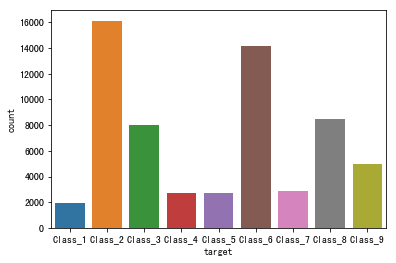

In [6]:
# 图形可视化,查看数据分布
import seaborn as sns

sns.countplot(data.target)

plt.show()

由上图可以看出,该数据类别不均衡,所以需要后期处理

# 数据基本处理

数据已经经过脱敏,不再需要特殊处理

## 截取部分数据

In [7]:
new1_data = data[:10000]
new1_data.shape

(10000, 95)

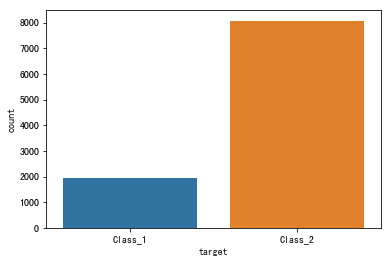

In [8]:
# 图形可视化,查看数据分布
import seaborn as sns

sns.countplot(new1_data.target)

plt.show()

使用上面方式获取数据不可行,然后使用随机欠采样获取响应的数据

In [9]:
# 随机欠采样获取数据
# 首先需要确定特征值\标签值

y = data["target"]
x = data.drop(["id", "target"], axis=1)

In [10]:
x.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [11]:
y.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [12]:
# 欠采样获取数据
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(x, y)

In [13]:
x.shape, y.shape

((61878, 93), (61878,))

In [14]:
X_resampled.shape, y_resampled.shape

((17361, 93), (17361,))

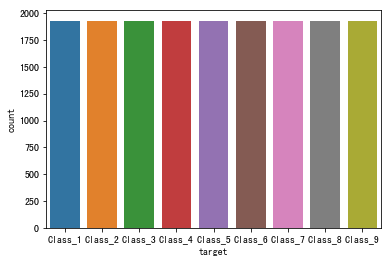

In [15]:
# 图形可视化,查看数据分布
import seaborn as sns

sns.countplot(y_resampled)

plt.show()

## 把标签值转换为数字

In [16]:
y_resampled.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_resampled = le.fit_transform(y_resampled)


In [18]:
y_resampled

array([0, 0, 0, ..., 8, 8, 8])

## 分割数据

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [20]:
x_train.shape, y_train.shape

((13888, 93), (13888,))

In [21]:
x_test.shape, y_test.shape

((3473, 93), (3473,))

In [22]:
# 1.数据获取

# 2.数据基本处理

    # 2.1 截取部分数据
    # 2.2 把标签纸转换为数字
    # 2.3 分割数据(使用StratifiedShuffleSplit)
    # 2.4 数据标准化
    # 2.5 数据pca降维

# 3.模型训练
    # 3.1 基本模型训练
    # 3.2 模型调优
        # 3.2.1 调优参数:
            # n_estimator,
            # max_depth,
            # min_child_weights,
            # subsamples,
            # consample_bytrees,
            # etas
        # 3.2.2 确定最后最优参数
    

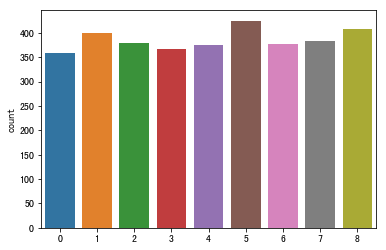

In [23]:
# 图形可视化
import seaborn as sns

sns.countplot(y_test)
plt.show()

In [28]:
# 通过StratifiedShuffleSplit实现数据分割

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X_resampled.values, y_resampled):
    print(len(train_index))
    print(len(test_index))
    
    x_train = X_resampled.values[train_index]
    x_val = X_resampled.values[test_index]
    
    y_train = y_resampled[train_index]
    y_val = y_resampled[test_index]

13888
3473


In [29]:
print(x_train.shape, x_val.shape)

(13888, 93) (3473, 93)


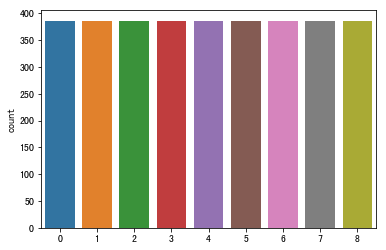

In [30]:
# 图形可视化
import seaborn as sns

sns.countplot(y_val)
plt.show()

## 数据标准化

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

## 数据PCA降维

In [33]:
x_train_scaled.shape

(13888, 93)

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)

x_train_pca = pca.fit_transform(x_train_scaled)
x_val_pca = pca.transform(x_val_scaled)

In [35]:
print(x_train_pca.shape, x_val_pca.shape)

(13888, 65) (3473, 65)


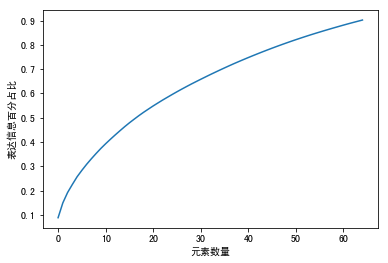

In [37]:
# 可视化数据降维信息变化程度
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("元素数量")
plt.ylabel("表达信息百分占比")

plt.show()

# 模型训练
## 基本模型训练 

In [38]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
# 输出预测值,一定输出带有百分占比的预测值
y_pre_proba = xgb.predict_proba(x_val_pca)

In [40]:
y_pre_proba

array([[0.4893983 , 0.00375719, 0.00225278, ..., 0.06179977, 0.17131925,
        0.03980364],
       [0.14336601, 0.01110009, 0.01018962, ..., 0.00691424, 0.02062171,
        0.7525783 ],
       [0.00834821, 0.14602502, 0.65013766, ..., 0.01385602, 0.00602207,
        0.00240582],
       ...,
       [0.09568001, 0.00293341, 0.00582061, ..., 0.1031019 , 0.7587154 ,
        0.02730099],
       [0.40236628, 0.12317444, 0.03567632, ..., 0.18818544, 0.13276173,
        0.07105519],
       [0.00473167, 0.01536749, 0.02546864, ..., 0.00882399, 0.88531935,
        0.00384397]], dtype=float32)

In [42]:
# logloss评估
from sklearn.metrics import log_loss

log_loss(y_val, y_pre_proba, eps=1e-15, normalize=True)

0.7845457684689274

In [43]:
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

## 模型调优
### 确定最优的estimators

In [44]:
scores_ne = []
n_estimators = [100, 200, 300, 400, 500, 550, 600, 700]

In [49]:
for nes in n_estimators:
    print("n_estimators:", nes)
    xgb = XGBClassifier(max_depth=3,
                        learning_rate=0.1, 
                        n_estimators=nes, 
                        objective="multi:softprob", 
                        n_jobs=-1, 
                        nthread=4, 
                        min_child_weight=1,
                        subsample=1,
                        colsample_bytree=1,
                        seed=42)
    
    xgb.fit(x_train_pca, y_train)
    y_pre = xgb.predict_proba(x_val_pca)
    score = log_loss(y_val, y_pre)
    scores_ne.append(score)
    
    print("每次测试的logloss值是:{}".format(score))

n_estimators: 100
每次测试的logloss值是:0.7845457684689274
n_estimators: 200
每次测试的logloss值是:0.7163659085830947
n_estimators: 300
每次测试的logloss值是:0.6933389946023942
n_estimators: 400
每次测试的logloss值是:0.68119252278615
n_estimators: 500
每次测试的logloss值是:0.67700775120196
n_estimators: 550
每次测试的logloss值是:0.6756911007299885
n_estimators: 600
每次测试的logloss值是:0.6757532660164814
n_estimators: 700
每次测试的logloss值是:0.6778721089881976


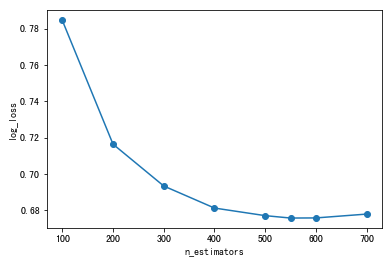

最优的n_estimators值是:550


In [50]:
# 图形化展示相应的logloss值
plt.plot(n_estimators, scores_ne, "o-")

plt.xlabel("n_estimators")
plt.ylabel("log_loss")
plt.show()

print("最优的n_estimators值是:{}".format(n_estimators[np.argmin(scores_ne)]))

### 确定最优的max_depth

In [63]:
scores_md = []
max_depths = [1,3,5,6,7]

In [64]:
for md in max_depths:
    print("max_depth:", md)
    xgb = XGBClassifier(max_depth=md,
                        learning_rate=0.1, 
                        n_estimators=n_estimators[np.argmin(scores_ne)], 
                        objective="multi:softprob", 
                        n_jobs=-1, 
                        nthread=4, 
                        min_child_weight=1,
                        subsample=1,
                        colsample_bytree=1,
                        seed=42)
    
    xgb.fit(x_train_pca, y_train)
    y_pre = xgb.predict_proba(x_val_pca)
    score = log_loss(y_val, y_pre)
    scores_md.append(score)
    
    print("每次测试的logloss值是:{}".format(score))

max_depth: 1
每次测试的logloss值是:0.8186777106711784
max_depth: 3
每次测试的logloss值是:0.6756911007299885
max_depth: 5
每次测试的logloss值是:0.730323661087053
max_depth: 6
每次测试的logloss值是:0.7693314501840949
max_depth: 7
每次测试的logloss值是:0.7889236364892144


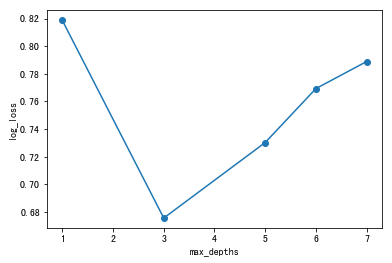

最优的max_depths值是:3


In [67]:
# 图形化展示相应的logloss值
plt.plot(max_depths, scores_md, "o-")

plt.xlabel("max_depths")
plt.ylabel("log_loss")
plt.show()

print("最优的max_depths值是:{}".format(max_depths[np.argmin(scores_md)]))

### 依据上面模式,运行调试下面参数

min_child_weights,

subsamples,

consample_bytrees,

etas

In [69]:
xgb = XGBClassifier(learning_rate =0.1, 
                    n_estimators=550, 
                    max_depth=3, 
                    min_child_weight=3, 
                    subsample=0.7, 
                    colsample_bytree=0.7, 
                    nthread=4, 
                    seed=42, 
                    objective='multi:softprob')

xgb.fit(x_train_scaled, y_train)

y_pre = xgb.predict_proba(x_val_scaled)

print("测试数据的log_loss值为 : {}".format(log_loss(y_val, y_pre, eps=1e-15, normalize=True)))

测试数据的log_loss值为 : 0.5944022517380477
